# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [300]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

pd.options.mode.chained_assignment = None

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
north_df.head(5)



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [75]:
#Code Used:
north_df['Rep ID'].count()


245

#### EDA Question 1B:  How many reps are in the South branch?  

In [25]:
#Code Used:
south_df['Rep ID'].count()

314

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [26]:
#Code Used: 
north_call_average_minutes = north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time","During Call Wait Time"]].mean()

north_call_average_minutes.round(decimals = 2) # rounding to two decimal places



Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
south_call_average_minutes = south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time","During Call Wait Time"]].mean()
south_call_average_minutes.round(decimals = 2) # rounding to two decimal places

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# Code Used: Combined calls by both centres
time_taken_per_time_block = north_df.groupby("Time Block")["Calls"].sum() + south_df.groupby("Time Block")["Calls"].sum()
time_taken_per_time_block

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 245
- 1b) Reps in the South Branch = 314


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Both call centres have missing data for incoming delay time. Incoming delay time is shows the time taken by representative after it is assigned. the missing value indicates there is less lag time meaning representatives are handling the call immediately.For this replacing null with "0" will make the data statstically better.


In [76]:
# Code Used
# Add Additional Cells as needed.

# Missing data of north call centre with heat map
cols = north_df.columns # variable assignmet to columns
north_df[cols].isnull().sum() # chacking columns with missing value

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [77]:
# Missing data of south call centre with heat map
cols = south_df.columns
south_df[cols].isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [78]:
north_df = north_df.fillna(0) # replacing null with 0
south_df = south_df.fillna(0) # replacing null with 0

In [79]:
cols = south_df.columns
print(south_df[cols].isnull().sum()) # checking if null present

print(north_df[cols].isnull().sum()) # chacking if null present

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64
Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Sale column should give only binary results either yes or no. Here the values are same but due to space "YES" values are giving different categories. This can be rectified by replacing "YES" value with single "YES" type value.

In [80]:
#Code Used
# Add Additional Cells as needed.

# Sale column categories
north_df.groupby("Sale")["Sale"].first() # checking to see sale categories there are three


Sale
NO        NO
YES      YES
YES     YES 
Name: Sale, dtype: object

In [81]:
#north_df["Sale"] = north_df["Sale"].apply(lambda x: x.str.strip())
north_df = north_df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # removing leading and trailiing spaces in all the columns
north_df.groupby("Sale")["Sale"].first()
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [82]:
south_df = south_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
south_df.groupby("Sale")["Sale"].first()
south_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: North_df has 2 duplicate rows and south_df has 3 duplicate rows. Duplicate rows are irregular data so I removed them.


In [83]:
north_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [86]:
#Code Used
# Add Additional Cells as needed.


north_df_dedupped = north_df.drop('Unnamed: 0', axis = 1).drop_duplicates() # removing index column and dropping duplicates
print(north_df.shape)
print(north_df_dedupped.shape)


(245, 15)
(243, 14)


In [87]:

south_df_dedupped = south_df.drop('Unnamed: 0', axis = 1).drop_duplicates()
print(south_df.shape)
print(south_df_dedupped.shape)

(314, 15)
(311, 14)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Both datasets have two columns Branch and Calls with 100% same data. In the dataset, Calls has single value as 1 meaning any representative is attending one call at given time block but Calls is numeric data that can be aggregated later to evaluate the performance of any repsentative. Branch is defining the region from where data is coming. For given region it seems unnecessary but when combinig the data it can become useful. Therefore this dataset do not have any unnecessary data that can be removed.

In [89]:
#Code Used
# Add Additional Cells as needed.
# checking percentage of repeting values in columns that can make column unnecessary
num_rows = len(north_df_dedupped.index)
north_df_dedupped_low_information_cols = [] #

for col in north_df_dedupped.columns:
    cnts = north_df_dedupped[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        north_df_dedupped_low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    243
Name: Branch, dtype: int64

Sale: 95.47325%
NO     232
YES     11
Name: Sale, dtype: int64

Lost Call: 97.94239%
0    238
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.11934%
0    236
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    243
Name: Calls, dtype: int64



In [91]:
# checking percentage of repeting values in columns that can make column unnecessary
num_rows = len(south_df_dedupped.index)
south_df_dedupped_low_information_cols = [] #

for col in south_df_dedupped.columns:
    cnts = south_df_dedupped[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        north_df_dedupped_low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    311
Name: Branch, dtype: int64

Sale: 98.07074%
NO     305
YES      6
Name: Sale, dtype: int64

Lost Call: 96.46302%
0    300
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.71383%
0    307
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    311
Name: Calls, dtype: int64



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [257]:
# Create dataframe for the entire company named df

frames = [north_df_dedupped,south_df_dedupped]
df = pd.concat(frames) # combining two datasets
print("combined set:", df.shape, "\nnorth_df_dedupped:", north_df_dedupped.shape, "\nsouth_df_dedupped:", south_df_dedupped.shape)



combined set: (554, 14) 
north_df_dedupped: (243, 14) 
south_df_dedupped: (311, 14)


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 Calls
- South Branch = Eric, 35 calls


In [370]:
# Code Used
# Add Additional Cells as needed.
# grouping data by rep id followed by branch and summing the calls and finally descending list and selected highest
repID_branch_group = df.groupby(['Rep ID', 'Branch'])
sum_data = repID_branch_group.agg(sum).sort_values(by = ['Calls'], ascending = False).reset_index()
north_highest_calls_rep = sum_data[sum_data['Branch'] == 'North'].head(1)
south_highest_calls_rep = sum_data[sum_data['Branch'] == 'South'].head(1)
print(north_highest_calls_rep[['Branch','Rep ID','Calls']],south_highest_calls_rep[['Branch','Rep ID','Calls']])

  Branch Rep ID  Calls
0  North  Brent     37   Branch Rep ID  Calls
1  South   Eric     35


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88
- South Branch = 1.29
- Company Wide = 1.99
- Do any of these fall out of the optimal range of 2-5%? None, of this fall out of range.





In [342]:
# Code Used
# Add Additional Cells as needed.
# 
Company_wide_abandonment_rate = (df['Abandoned'].sum()/df['Calls'].sum()) * 100
print("Company_wide:", Company_wide_abandonment_rate.round(decimals = 2))
branch_group = df.groupby(['Branch'])
abandoment_rate_by_branch = (branch_group['Abandoned'].sum()/ branch_group['Calls'].sum())* 100
abandoment_rate_by_branch.round(decimals = 2).reset_index()



Company_wide: 1.99


,Branch,0
0,North,2.88
1,South,1.29


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.25% , Total number of quick calls = 195
- South Branch = 75.24% , Total number of quick calls = 234
- Company Wide = 77.44% , Total number of quick calls = 429

In [228]:
# Code Used
# Add Additional Cells as needed.

quick_calls = df[df['Incoming Wait Time'] <= 2]
branch_wise_quick_calls = quick_calls.groupby('Branch')
branch_wise_total_calls = df.groupby('Branch')

company_wide_service_level_percentage = (quick_calls['Calls'].sum()/ df['Calls'].sum()) *100
branch_wise_service_level_percentage = (branch_wise_quick_calls['Calls'].sum()/ branch_wise_total_calls['Calls'].sum())*100

print("company_wide_service_level_percentage:" ,company_wide_service_level_percentage.round(decimals = 2), "\nbranch_wide_service_level_percentage",branch_wise_service_level_percentage.round(decimals = 2) )

print("company_wide_quick_calls:" , quick_calls['Calls'].sum(), "\nbranch_wise_quick_calls", branch_wise_quick_calls['Calls'].sum())

company_wide_service_level_percentage: 77.44 
branch_wide_service_level_percentage Branch
North    80.25
South    75.24
Name: Calls, dtype: float64
company_wide_quick_calls: 429 
branch_wise_quick_calls Branch
North    195
South    234
Name: Calls, dtype: int64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.01
- South Branch in seconds = 1.21
- Company Wide in seconds = 1.12


In [254]:
# Code Used 
company_average_speed_answer = df["Incoming Wait Time"].mean()
branch_average_speed_answer = df.groupby('Branch')["Incoming Wait Time"].mean()
print('company_average_speed:', round(company_average_speed_answer, 2))
print("branch_average_speed:" , round(branch_average_speed_answer,2))


company_average_speed: 1.12
branch_average_speed: Branch
North    1.01
South    1.21
Name: Incoming Wait Time, dtype: float64


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I am using bar graph here because we want to present the sum of abandonment rate with respect to evry queue. 

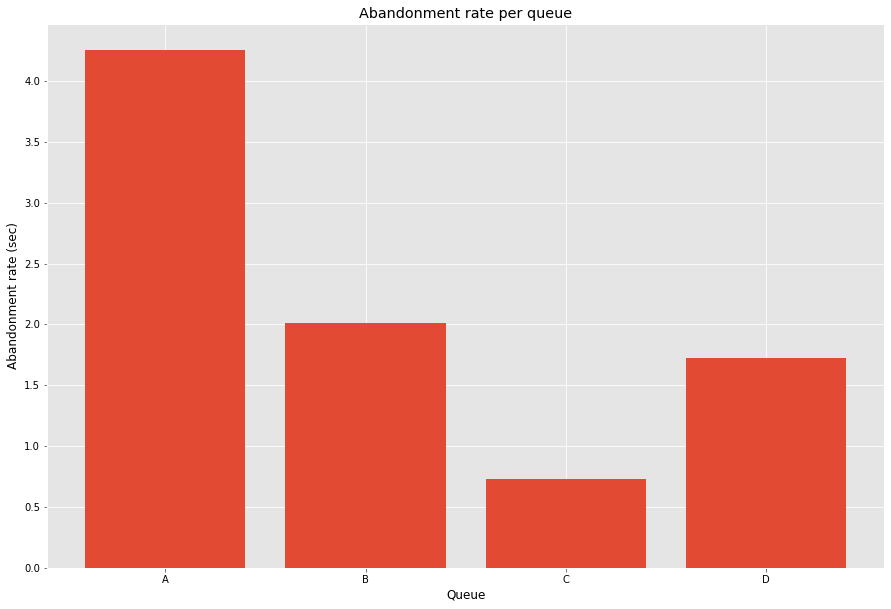

In [315]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] ) * 100


#Your Code Here:
x,y = zip(*abandonment_rates.items())
plt.bar(x,y)
plt.title('Abandonment rate per queue', color = 'black')
plt.xlabel('Queue', color = 'black')
plt.ylabel('Abandonment rate (sec)', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I am using bar graph here because we want to present the data with respective to every reprsentative so it is easy to understand.

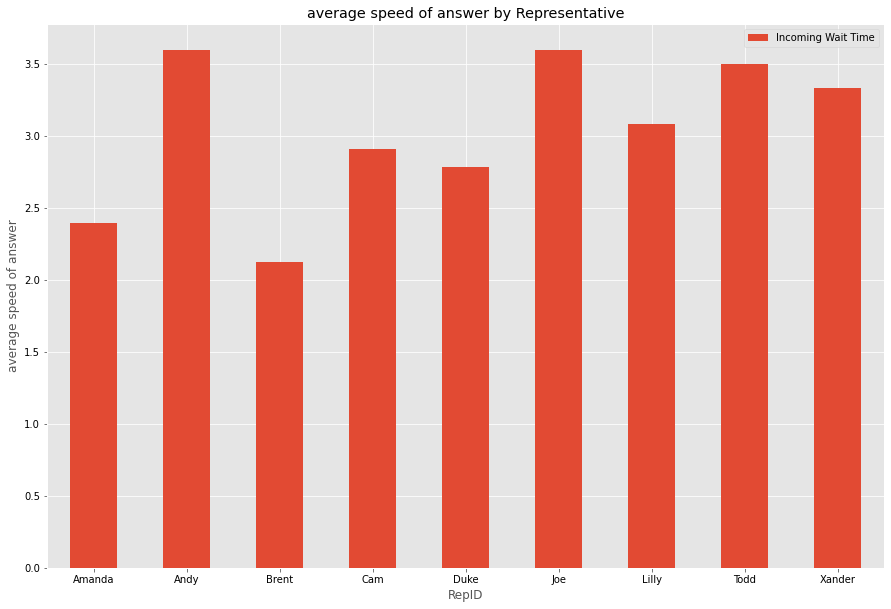

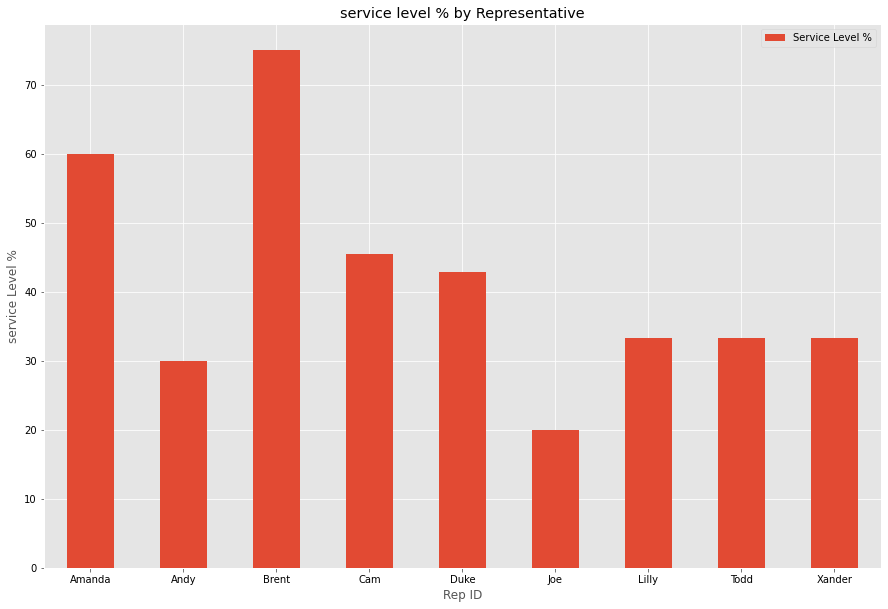

In [339]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level = service_level.reset_index()
service_level
#Your Code Here:

north_plt.plot.bar(x = 'Rep ID' , y = 'Incoming Wait Time', rot = 0)
plt.title('average speed of answer by Representative')
plt.xlabel('RepID')
plt.ylabel('average speed of answer')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

service_level.plot.bar(x = 'Rep ID' , y = 'Service Level %', rot = 0)
plt.title('service level % by Representative')
plt.xlabel('Rep ID')
plt.ylabel('service Level %')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: For this data grouped bar chart will be benificial as it will determine both incoming and outgoing calls together.

In [357]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()


complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
print(purpose_counts,complaints, sales_support, product_support)

#Your Code Here:
x1,y1 = zip(*complaints.items())
x2,y2 = zip(*sales_support.items())
x3,y3 = zip(*product_support.items())

# plot grouped bar chart


plt.show()


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64 {'Incoming': 51} {'Outgoing': 120, 'Incoming': 73} {'Outgoing': 228, 'Incoming': 82}


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
Average Call Abandonment Rates:

North Branch = 2.88
South Branch = 1.29
Company Wide = 1.99

Average speed of answer
North Branch in seconds = 1.01
South Branch in seconds = 1.21
Company Wide in seconds = 1.12

Percentage of calls answered within 2 seconds, include # of calls:

North Branch = 80.25% , Total number of quick calls = 195
South Branch = 75.24% , Total number of quick calls = 234
Company Wide = 77.44% , Total number of quick calls = 429

According to above KPIs, North branch is working efficiently as percentage of calls answered within 2 seconds is high and average speed of answer is low, indicating that their repsentatives are working efficiently. on the other hand south branch has lower percentage of quck calls and also average speed to answer is low too. Looking at abandonment rate north branch is doing poor but this KPI also include customer calling at give time slot and their involvement therefore North branch is doing good.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
North branch will be benifitted with extra help as they have less representatives that can retain customers who are abandoning the call even before representative can reach them. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Although the data is complete to answer above question but the analysis with the call purpose and branch will be benificial.Another factor that is important is customers locations which can determine the services involved and to better understand the abandon and lost call reasons.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: